# Dataset

## Import Libraries

In [4]:
# Import libraries
import os
from torch.utils.data import DataLoader,Dataset, random_split, Subset
from skimage import io, transform
from matplotlib import pyplot as plt
import numpy as np
import fnmatch
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
from tqdm import tqdm

## Define Dataset Class

In [5]:
def transform_image(image_path,target_height,target_witdth):
    image = Image.open(image_path)
    transform = transforms.Resize(size = (target_height,target_witdth))
    image = transform(image)
    return image

def find_files(directory, pattern='*.jpeg'):
        """Recursively find all files matching the pattern."""
        image_path_list = []
        for root, dirnames, filenames in os.walk(directory):
            for filename in fnmatch.filter(filenames, pattern):
                image_path_list.append(os.path.join(root, filename))
        return image_path_list

def resize_folder(dir_path,target_height,target_witdth):
    list_image_path = find_files(dir_path)
    for image_path in tqdm(list_image_path):
        #resize image
        image = Image.open(image_path)
        transform = transforms.Resize(size = (target_height,target_witdth))
        image = transform(image)
        new_image = transform(image)
        
        main_dataset = image_path.split('/')[0]
        sub_dataset = image_path.split('/')[1]
        label = image_path.split('/')[2]
        file = image_path.split('/')[-1]
        file = file.split('.')[0]
        new_folder = str(main_dataset)+'/'+str(sub_dataset)+'_resized_'+str(target_height)+'_'+str(target_witdth)+'/'+str(label)+'/'
        if not os.path.exists(new_folder):
            os.makedirs(new_folder)
        new_image.save(os.path.join(new_folder, file +'_resized'+'.jpeg'), 'JPEG', optimize=True)
    resized_folder = str(main_dataset)+'/'+str(sub_dataset)+'_resized_'+str(target_height)+'_'+str(target_witdth)  
    return str(resized_folder)

In [6]:
class XrayDataset(Dataset):

    def __init__(self, image_dir):
        """Initialize the attributes of the object of the class."""
        self.image_dir = image_dir
        self.image_path_list = sorted(self._find_files(image_dir))
        self.classes = self._get_class()
        self.class_to_idx  = self._get_class_index()

    def __len__(self):
        """Return the size of the dataset."""
        return len(self.image_path_list)

    def __getitem__(self, index):
        """Return a data sample (=image) for a given index, along with the name of the corresponding pokemon."""
        
        # TO DO:
        image_path = self.image_path_list[index]
        label = image_path.split('/')[-2]
        label = self.class_to_idx[label]
        x = io.imread(image_path)
        image_np = x / np.max(x)
#         x = torch.tensor(image_np, dtype=float)
        x = torch.tensor(image_np).float()
        x = x.unsqueeze(0)
        return x, label

    def _find_files(self, directory, pattern='*.jpeg'):
        """Recursively find all files matching the pattern."""
        image_path_list = []
        for root, dirnames, filenames in os.walk(directory):
            for filename in fnmatch.filter(filenames, pattern):
                image_path_list.append(os.path.join(root, filename))
        return image_path_list
    
    def _get_class(self):
        classes = []
        for path in self.image_path_list:
            class_image = path.split('/')[2]
            if class_image not in classes:
                classes.append(class_image)
        return classes
    
    def _get_class_index(self):
        idx_to_class = {i:j for i, j in enumerate(self.classes)}
        class_to_idx = {value:key for key,value in idx_to_class.items()}
        return class_to_idx
    

## Resize all image

Since our images have different size and the size of the image is also big. we will resize our image the the same size and smaller than before.

Our dataset already divided into three part, so we don't need to divided it again. Moreover, we don't want to re-run it again. so we did not run resized image overwrite on original image, we keep it in other folder.

In [26]:
# # Resize image for training
# train_path = 'Dataset/train'
# resized_train_path = resize_folder(train_path,target_height=256,target_witdth=256)

# # Resize image for validation
# valid_path = 'Dataset/val'
# resized_valid_path = resize_folder(valid_path,target_height=256,target_witdth=256)

# # Resize image for testing
# test_path = 'Dataset/test'
# resized_test_path = resize_folder(test_path,target_height=256,target_witdth=256)

  0%|                                                  | 0/5216 [00:00<?, ?it/s]


TypeError: 'JpegImageFile' object is not subscriptable

In [52]:
# We can initialize the dataset by providing the directory of the image corpus data
train_dataset = XrayDataset(image_dir='/Dataset/train_resized_256_256')

valid_dataset = XrayDataset(image_dir='/Dataset/val_resized_256_256')

test_dataset = XrayDataset(image_dir='/Dataset/test_resized_256_256')




In [53]:
train_dataset

## Testing other function on XrayDataset

In [54]:
train_dataset._get_class()

[]

In [49]:
train_dataset._get_class_index()

{}

In [50]:
train_path_list = train_dataset._find_files(resized_train_path)
len(train_path_list)

NameError: name 'resized_train_path' is not defined

In [10]:
# Equivalently, since this list is stored as an inner attribute, you can access it directly:
image_list = train_dataset.image_path_list
image_list[:10]

['Dataset/train_resized_256_256/NORMAL/IM-0115-0001_resized.jpeg',
 'Dataset/train_resized_256_256/NORMAL/IM-0117-0001_resized.jpeg',
 'Dataset/train_resized_256_256/NORMAL/IM-0119-0001_resized.jpeg',
 'Dataset/train_resized_256_256/NORMAL/IM-0122-0001_resized.jpeg',
 'Dataset/train_resized_256_256/NORMAL/IM-0125-0001_resized.jpeg',
 'Dataset/train_resized_256_256/NORMAL/IM-0127-0001_resized.jpeg',
 'Dataset/train_resized_256_256/NORMAL/IM-0128-0001_resized.jpeg',
 'Dataset/train_resized_256_256/NORMAL/IM-0129-0001_resized.jpeg',
 'Dataset/train_resized_256_256/NORMAL/IM-0131-0001_resized.jpeg',
 'Dataset/train_resized_256_256/NORMAL/IM-0133-0001_resized.jpeg']

In [11]:
#For train dataset
image_dir = 'Dataset/train_resized'
dataset = XrayDataset(image_dir=image_dir)

# Equivalently, since this list is stored as an inner attribute, you can access it directly:
image_path_list = dataset.image_path_list

# Display all file paths
# for l in image_path_list:
#     print(l)
print('Number of images in the list', len(image_path_list))

Number of images in the list 0


## Set data into DataLoader

In [12]:
batch_size = 8

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size)

test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

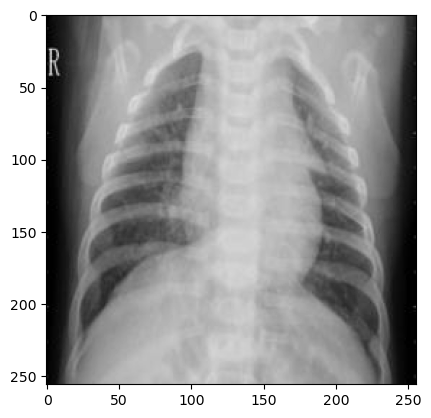

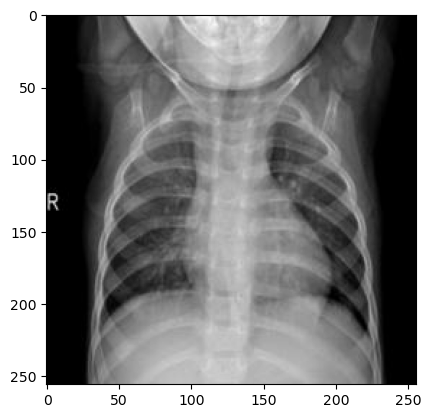

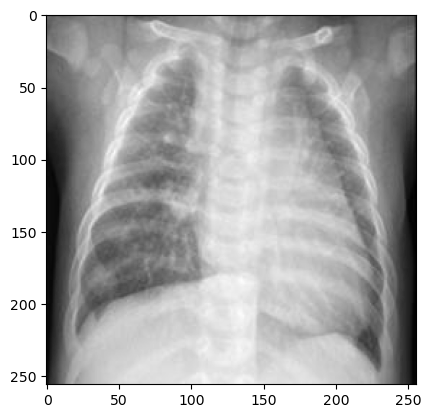

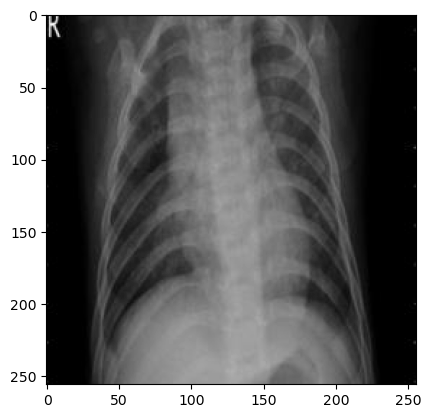

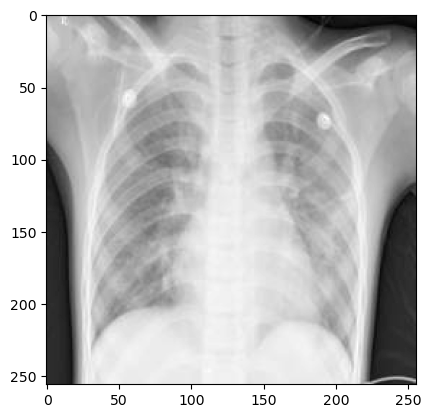

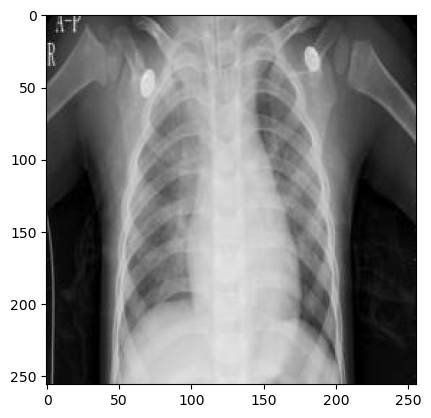

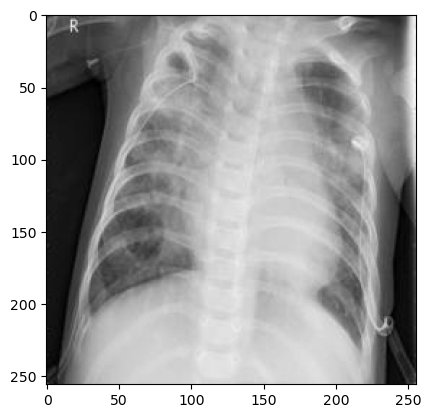

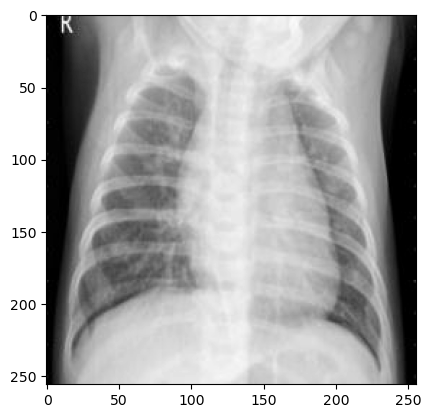

In [13]:
# Get a batch of images from the train dataloader and print it
dataiter = iter(train_dataloader)
image_batch_example = dataiter.next()[0]
for ip in range(batch_size):
    plt.figure()
    plt.imshow(image_batch_example[ip, :].squeeze().detach().numpy(), cmap='gray')
    plt.show()

torch.Size([8])


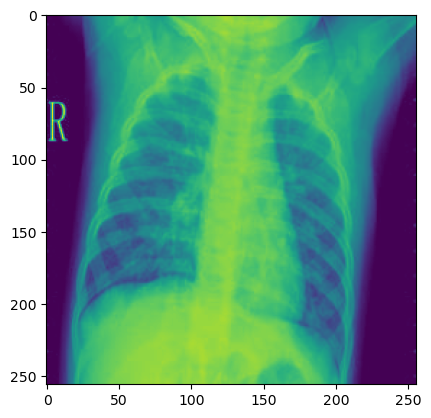

In [14]:
image = next(iter(train_dataloader))
print(image[-1].shape)
plt.imshow(image[0][1].squeeze().detach().numpy())
plt.show()

In [15]:
image[0]

tensor([[[[ 48.,  50.,  51.,  ..., 161., 165., 169.],
          [ 49.,  50.,  50.,  ..., 160., 162., 163.],
          [ 49.,  48.,  47.,  ..., 168., 171., 171.],
          ...,
          [ 45.,  30.,  16.,  ...,   2.,  21.,  36.],
          [ 40.,  28.,  18.,  ...,   2.,  17.,  30.],
          [ 19.,  17.,  18.,  ...,   1.,   4.,   8.]]],


        [[[  0.,   0.,   0.,  ..., 125., 127., 129.],
          [  1.,   1.,   0.,  ..., 126., 129., 132.],
          [  0.,   2.,   3.,  ..., 126., 130., 134.],
          ...,
          [  0.,   1.,   4.,  ...,   4.,   1.,   0.],
          [  1.,   1.,   1.,  ...,   1.,   1.,   1.],
          [  1.,   0.,   0.,  ...,   0.,   0.,   1.]]],


        [[[ 36.,  42.,  49.,  ...,  77.,  89., 105.],
          [ 34.,  40.,  48.,  ...,  77.,  89., 105.],
          [ 32.,  38.,  45.,  ...,  76.,  88., 104.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0., 

# CNN model

## Create CNN model

In [30]:
class CNN_Classif(nn.Module):
    def __init__(self, num_channels1=16, num_channels2=32, num_classes=2):
        super(CNN_Classif, self).__init__()
        self.cnn_layer1 = nn.Sequential(nn.Conv2d(1, num_channels1, kernel_size=5, padding=2),
                        nn.ReLU(),
                        nn.BatchNorm2d(num_channels1),
                        nn.MaxPool2d(kernel_size=2))
        self.cnn_layer2 = nn.Sequential(nn.Conv2d(num_channels1, num_channels2, kernel_size=5, padding=2),
                        nn.ReLU(),
                        nn.BatchNorm2d(num_channels2),
                        nn.MaxPool2d(kernel_size=2))
        self.lin_layer = nn.Linear(7*7*num_channels2, num_classes)
        
    def forward(self, x):
        out = self.cnn_layer1(x)
        out = self.cnn_layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.lin_layer(out)
        return out

In [17]:
image_batch_example, labels_batch_example = next(iter(train_dataloader))

In [31]:
cnn_layer1 = nn.Sequential(nn.Conv2d(1, 16, kernel_size=5, padding=2),
                           nn.ReLU(),
                           nn.MaxPool2d(kernel_size=2))
out1 = cnn_layer1(x)
print(out1.shape)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1317, 1857]

In [ ]:
cnn_layer1

## Training Function

In [ ]:

def training_cnn_classifier(model, train_dataloader, num_epochs, loss_fn, learning_rate, device='cpu', verbose=True):

    # Set the model
    model = model.to(device)
    model.train()
    
    # define the optimizer (SGD)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    # Initialize a list to save the training loss over epochs
    loss_total = []
    
    # Training loop
    for epoch in range(num_epochs):
        loss_current_epoch = 0
        for batch_index, (images, labels) in enumerate(train_dataloader):
            # copy images and labels to the device
            images = images.to(device)
            labels = labels.to(device)

            # forward pass
            y_predicted = model(images)
            loss = loss_fn(y_predicted, labels)

            # backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Record the loss
            loss_current_epoch += loss.item()

        # At the end of each epoch, save the average loss over batches and display it
        loss_total.append(loss_current_epoch)
        if verbose:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss_current_epoch))
        
    return model, loss_total

In [ ]:
for batch_index, (images, labels) in enumerate(train_dataloader):
    images = images.to(device)
    labels = labels.to(device)
    print(images)

## Evaluation Function

In [ ]:
# Eval function

def eval_cnn_classifier(model, eval_dataloader, device):
    # Prepare the model (copy to device and disable some layers (batch norm, dropout...) when evaluating
    model.to(device)
    model.eval() 

    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        # initialize the total and correct number of labels to compute the accuracy
        correct = 0
        total = 0
        for images, labels in eval_dataloader:
            images = images.to(device)
            labels = labels.to(device)
            y_predicted = model(images)
            _, label_predicted = torch.max(y_predicted.data, 1)
            total += labels.size(0)
            correct += (label_predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    
    return accuracy

## Instantiate the model

In [ ]:
# Instantiate the model
num_channels1 = 16
num_channels2 = 32
num_classes = 2
model_cnn = CNN_Classif(num_channels1, num_channels2, num_classes)

# Print the total number of parameters in the model
print('Total number of parameters: ', sum(p.numel() for p in model_cnn.parameters()))

In [ ]:
# Optimizer
num_epochs = 20
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.001

# Training
model_cnn, loss_total = training_cnn_classifier(model_cnn, train_dataloader, num_epochs, loss_fn, learning_rate, device='cpu', verbose=True)

# Save the model and display the loss over epochs
torch.save(model_cnn.state_dict(), 'model_cnn_classif.pt')
plt.plot(loss_total)
plt.show()